<a href="https://colab.research.google.com/github/jmofarias/machine_learning/blob/master/analisando_cancer_de_pulmao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dados de Câncer de Pulmão**

* Dataset com dados referentes ao câncer de pulmão.
* [Long Cancer](https://www.kaggle.com/yusufdede/lung-cancer-dataset)

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


## 1. Importando Bibliotecas

In [11]:
# importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Leitura dos dados utilizando a biblioteca Pandas

In [12]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine_Learning/Datasets/lung_cancer_examples.csv')

In [13]:
dados.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


## 3. Limpeza e organização dos dados

In [14]:
# verificar se existem valores NAN, ? ou dados faltantes
dados = dados.dropna()

In [15]:
# excluir colunas irrelevantes
dados = dados.drop(columns=['Name', 'Surname'])
dados.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


## 4. Análise preliminar dos dados

In [ ]:
# importanto biblioteca para entendimento dos gráficos
import matplotlib.pyplot as plt

#### Histograma

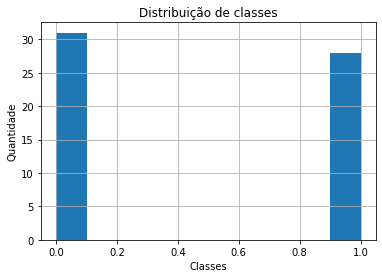

In [23]:
# verificando distribuição de classes
plt.hist(dados['Result'])
plt.title('Distribuição de classes')
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.grid(True)
plt.show()

In [52]:
# quantidades de ocorrencias de cada classe
print('Benigno:',dados[dados['Result']==0].shape[0])
print('Maligno:',dados[dados['Result']==1].shape[0])

Benigno: 31
Maligno: 28


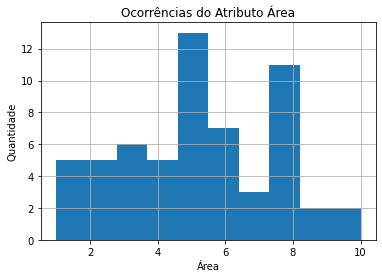

In [21]:
# ocorrências do atributo área
plt.hist(dados['AreaQ'],10)
plt.xlabel('Área')
plt.ylabel('Quantidade')
plt.title('Ocorrências do Atributo Área')
plt.grid(True)
plt.show()

#### Distribuição de probabilidade

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


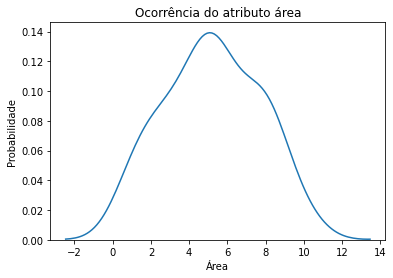

In [22]:
import seaborn as sns

sns.distplot(dados.AreaQ, hist = False, rug = False)
plt.title('Ocorrência do atributo área')
plt.xlabel('Área')
plt.ylabel('Probabilidade')
plt.show()

#### Análise comparativa dos componentes

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


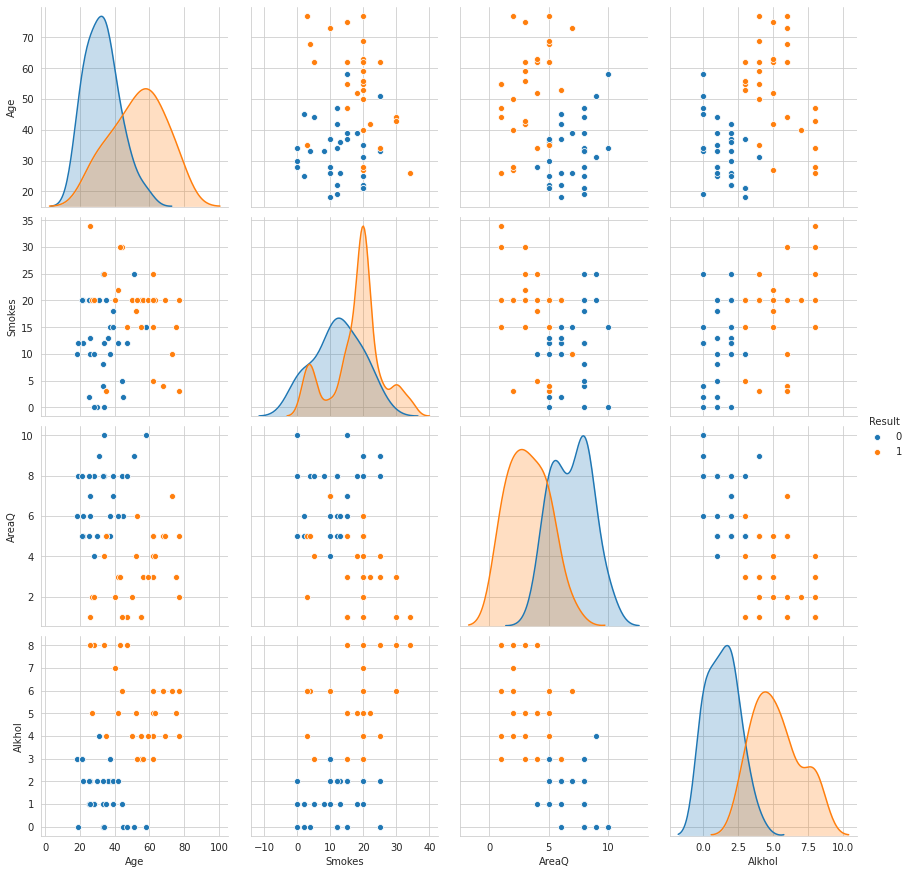

In [28]:
# visualização dos dados
sns.set_style()
sns.pairplot(dados,hue="Resultado",size=3);
plt.show()

#### Relação entre componentes

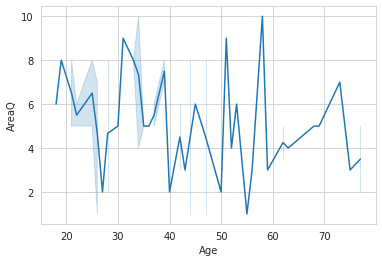

In [39]:
# relação entre idade e área
sns.lineplot(x=dados['Age'],y=dados['AreaQ'],data=dados)

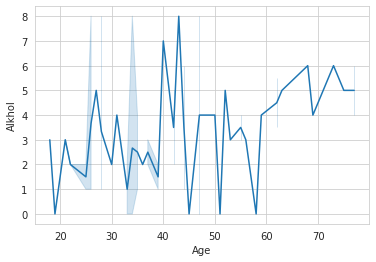

In [41]:
# relação entre idade e álcool
sns.lineplot(x=dados['Age'],y=dados['Alkhol'],data=dados)

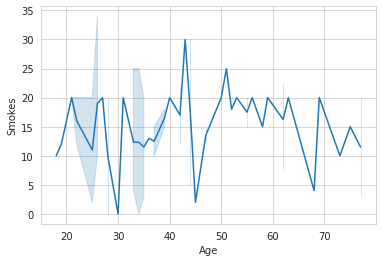

In [43]:
# relação entre idade e fumantes
sns.lineplot(x=dados['Age'],y=dados['Smokes'],data=dados)

#### Diagrama de caixa (*BoxPlot*)

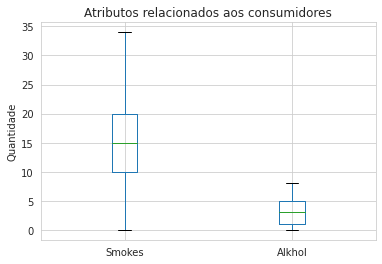

In [49]:
# box plot dos consumidores de cigarro e álcool
dados[['Smokes','Alkhol']].boxplot()
plt.ylabel('Quantidade')
plt.title('Atributos relacionados aos consumidores')
plt.show()

In [53]:
# dataframe para os nodulos benignos
benigno = dados[dados['Result']==0].drop(columns=['Result']).reset_index(drop=True)

In [54]:
# dataframe para os nodulos benignos
maligno = dados[dados['Result']==1].drop(columns=['Result']).reset_index(drop=True)

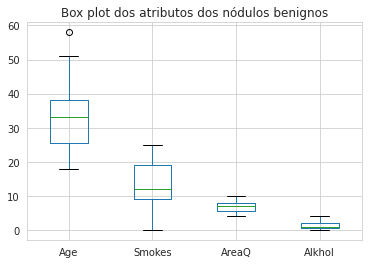

In [55]:
# box plot dos dados das instâncias benignas
benigno.boxplot()
plt.title('Box plot dos atributos dos nódulos benignos')
plt.show()

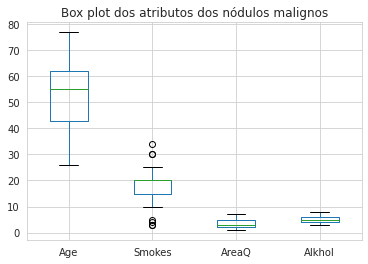

In [56]:
# boxplots dos dados das instâncias malignas
maligno.boxplot()
plt.title('Box plot dos atributos dos nódulos malignos')
plt.show()

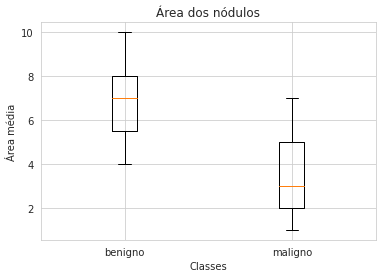

In [58]:
# box plot comparando o perimetro medio para as duas classes
plt.boxplot([benigno.AreaQ,maligno.AreaQ],labels=['benigno','maligno'])
plt.xlabel('Classes')
plt.ylabel('Área média')
plt.title('Área dos nódulos')
plt.show()

#### Distribuição de probabilidades

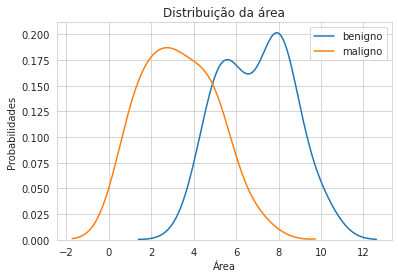

In [102]:
# distribuição de probabilidade da área para as duas classes
sns.distplot(benigno.AreaQ, hist=False, rug=False,label='benigno')
sns.distplot(maligno.AreaQ, hist=False, rug=False,label='maligno')
plt.xlabel('Área')
plt.ylabel('Probabilidades')
plt.title('Distribuição da área')
plt.show()

## Análise estatística dos dados

#### Média

In [60]:
benigno.mean()

Age       32.870968
Smokes    12.258065
AreaQ      6.935484
Alkhol     1.419355
dtype: float64

In [61]:
maligno.mean()

Age       53.428571
Smokes    18.178571
AreaQ      3.285714
Alkhol     5.250000
dtype: float64

#### Desvio padrão

In [62]:
benigno.std()

Age       9.745912
Smokes    7.215575
AreaQ     1.631676
Alkhol    1.118755
dtype: float64

In [63]:
maligno.std()

Age       15.179002
Smokes     7.746223
AreaQ      1.674584
Alkhol     1.669442
dtype: float64

#### Mediana

In [64]:
benigno.median()

Age       33.0
Smokes    12.0
AreaQ      7.0
Alkhol     1.0
dtype: float64

In [65]:
maligno.median()

Age       55.0
Smokes    20.0
AreaQ      3.0
Alkhol     5.0
dtype: float64

#### Gráfico de barras comparando a média e desvio padrão da área dos tipos de câncer

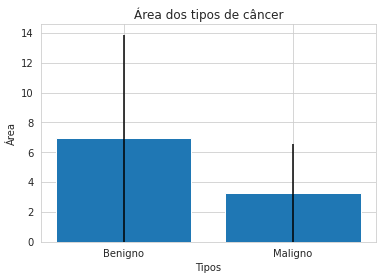

In [69]:
plt.bar(['Benigno', 'Maligno'], [benigno.AreaQ.mean(), maligno.AreaQ.mean()], yerr = [benigno.AreaQ.mean(), maligno.AreaQ.mean()])
plt.title('Área dos tipos de câncer')
plt.xlabel('Tipos')
plt.ylabel('Área')
plt.show()

## Estudo de correlação entre atributos 

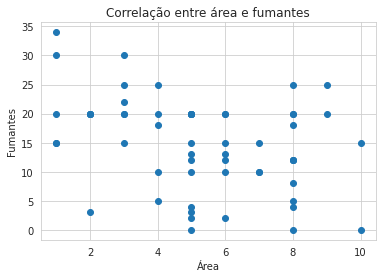

In [77]:
# correlação entre área e fumantes
plt.scatter(dados.AreaQ,dados.Smokes)
plt.xlabel('Área')
plt.ylabel('Fumantes')
plt.title('Correlação entre área e fumantes')
plt.show()

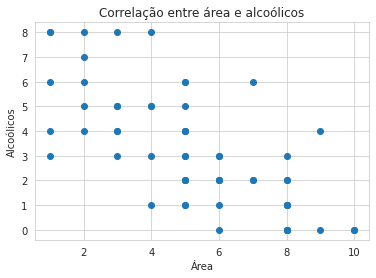

In [79]:
# correlação entre área e alcoólicos
plt.scatter(dados.AreaQ,dados.Alkhol)
plt.xlabel('Área')
plt.ylabel('Alcoólicos')
plt.title('Correlação entre área e alcoólicos')
plt.show()

In [83]:
# coeficiente de correlação entre duas colunas
corr = dados['AreaQ'].corr(dados['Smokes'])
corr

-0.35329479838345285

In [84]:
# coeficiente de correlação entre duas colunas
corr = dados['AreaQ'].corr(dados['Alkhol'])
corr

-0.7144123550483339

In [50]:
# correlação entre todos os atributos
corr = dados.corr()
corr

,Age,Smokes,AreaQ,Alkhol,Result
Age,1.000000,0.053665,-0.268957,0.318621,0.637726
Smokes,0.053665,1.000000,-0.353295,0.469915,0.373444
AreaQ,-0.268957,-0.353295,1.000000,-0.714412,-0.746621
Alkhol,0.318621,0.469915,-0.714412,1.000000,0.810439
Result,0.637726,0.373444,-0.746621,0.810439,1.000000


#### Mapa de calor (*Heatmap*)

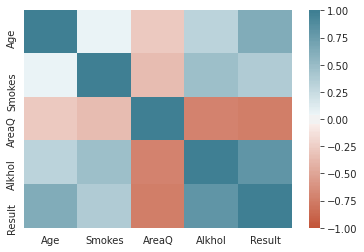

In [82]:
sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(20, 220, n = 200))

## 5. Re-escala dos dados

In [ ]:
# dados de area
area = dados.AreaQ
area

In [ ]:
# dados de fumantes
smokes = dados.Smokes
smokes

In [ ]:
# dados de alcoólicos
alcool = dados.Alkhol
alcool

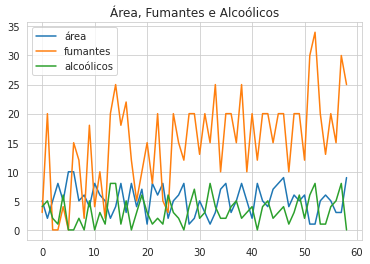

In [93]:
# plotando área, fumantes e alcoólicos em um gráfico
plt.plot(area, label='área')
plt.plot(smokes, label='fumantes')
plt.plot(alcool, label='alcoólicos')
plt.title('Área, Fumantes e Alcoólicos')
plt.legend()
plt.show()

In [99]:
# re-escala pelo máximo
area = area/area.max()
smokes = smokes/smokes.max()
alcool = alcool/alcool.max()

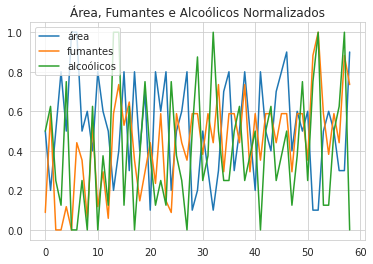

In [100]:
# plotando área, fumantes e alcoólicos em um gráfico
plt.plot(area, label='área')
plt.plot(smokes, label='fumantes')
plt.plot(alcool, label='alcoólicos')
plt.title('Área, Fumantes e Alcoólicos Normalizados')
plt.legend()
plt.show()

## 6. Considerações Finais

* O câncer de pulmão, também conhecido como carcinoma de pulmão, é um tumor maligno de pulmão caracterizado pelo crescimento descontrolado de células nos tecidos do pulmão. Esse crescimento pode se espalhar além do pulmão pelo processo de metástase em tecidos próximos ou outras partes do corpo.

* À vista disso, o câncer de pulmão é a principal causa de mortes por câncer em todo o mundo.

* O estudo mostrou que pessoas que fumam correm o maior risco de câncer de pulmão, embora o câncer de pulmão também possa ocorrer em pessoas que nunca fumaram.

* O risco de câncer de pulmão aumenta com o tempo e o número de cigarros que você fumou.

* Se você parar de fumar, mesmo depois de fumar por muitos anos, pode reduzir significativamente suas chances de desenvolver câncer de pulmão.

* De acordo com os dados, pessoas pertencentes ao grupo de idade 40-50 consomem mais álcool.

* Já as pessoas da faixa etária de 60 a 70 anos fumam mais, seguidas da faixa de 20 a 30 anos.

* Pessoas de aproximadamente 33 anos têm a maior área de tumor cancerígeno.

* Mais tabagismo causando maior risco de malignidade